### <p style="text-align: right;"> &#9989; Katie Pocock</p>


# MTH 496 HW1 

Due date: Friday, Sept 30, 2022



2 Programming Homework
Note Submit your homework on D2L → Assessments → Assignment. Please only submit a
jupyter notebook, and name it as HW1 FirstName LastName. For example: HW1 Xiaoqi Wei.ipynb

**&#9989; **Problem 1 (65pts).****. Given the Iris dataset. It has been split into training data: Iris X train.csv
(features), Iris y train.csv and test data Iris X test.csv (features), Iris y test.csv.
File Iris description.txt describes the meaning of each column in the data set.
- a) Program a regularized logistic regression model to predict the test data. (sklearn.linear model
is not allowed to use.)
- b) Comment on the choice of regularized parameters

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
Iris_X_test = pd.read_csv('Iris_X_test.csv')
Iris_X_train = pd.read_csv('Iris_X_train.csv')

Iris_y_test = pd.read_csv('Iris_y_test.csv')
Iris_y_train = pd.read_csv('Iris_y_train.csv')

X_test = Iris_X_test.values
X_train = Iris_X_train.values
y_test = Iris_y_test.values
y_train = Iris_y_train.values

X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])


cost: 0.7631471805599452 for 0 iterations.
cost: 0.7281013101981045 for 1000 iterations.
cost: 0.7130488573280009 for 2000 iterations.
cost: 0.7056552299250763 for 3000 iterations.
cost: 0.7014342226693104 for 4000 iterations.
cost: 0.6986446856112776 for 5000 iterations.
cost: 0.6965551823387013 for 6000 iterations.
cost: 0.6948326278714893 for 7000 iterations.
cost: 0.6933137511868639 for 8000 iterations.
cost: 0.6919135270628188 for 9000 iterations.
Regression Accuracy: 71.05263157894737 %


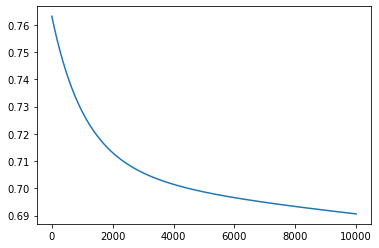

In [121]:
def sigmoid(z):
    return (1.0/(1 + np.exp(-z)))


def logistic_regression(X, y, lr, epochs, reg_parameter):
    m = X_train.shape[1]
    n = X_train.shape[0]
        #weight and bias
    w = np.zeros((n,1))
    b = 0
    
    cost_list = []
    
    for i in range(epochs):
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)
        
        cost = -(1/m)*np.sum(y*np.log(A) + (1-y)*np.log(1-A))+(reg_parameter/(2*n))*np.sum(A**2)
        
        dw = (1/m)*np.dot(A-y, X.T)
        db = (1/m)*np.sum(A-y)
        
        w = w - lr*dw.T
        b = b - lr*db
        
        cost_list.append(cost)
        
        if(i%(epochs/10) == 0):
            print('cost:',cost, 'for' , i , 'iterations.')
            
    return w,b, cost_list
    
epochs = 10000
lr = 0.00005
reg_parameter = 0.01 #chose this regularization parameter based on reducing overfitting(as when 0.001 is used and the graph is less representattive of the best fit)
w, b, cost_list = logistic_regression(X_train, y_train, lr = lr, epochs = epochs,  reg_parameter = reg_parameter)

plt.plot(np.arange(epochs), cost_list)
    
    
    
def accuracy(X, y, w, b):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    acc = (1-np.sum(np.abs(A-y))/y.shape[1])*100
    print("Regression Accuracy:", acc, '%')
    
accuracy(X_test, y_test, w, b)
    
    
    